# Clone, get data and add simulations to the CoRe DB

Illustrates the use of the watpy objects to work with the CoRe DB.

SB 09/2021 core@uni-jena.de

## 0. Start

Clone the repo somewhere and install the package:

```
mkdir somewhere/
cd somehwere/
git clone git@git.tpi.uni-jena.de:core/watpy.git
cd watpy
python setup.py --user
```

Now look at the folders and see some files: they contain python code, functions and classes.

Go to the examples

```
cd tutorials
```

and find this tutorial.

The following assumes there is some test data a folder called `./TestData/MySim_BAM_135135/CoReDB`. This can be generated running the `watpy_wav.ipynb`. We will be cloning part of the CoRe DB from the gitlab repsitory

https://core-gitlfs.tpi.uni-jena.de/core_database

so prepare a folder for those data:

```
mkdir CoRe_DB_clone # for local clone of the CoRe DB
```

or

In [1]:
import os
os.makedirs('./CoRe_DB_clone', exist_ok=True)

## 1. Clone the CoRe DB

In [2]:
from watpy.coredb.coredb import *

Initialize a `CoRe_db()` object by specifying the path where we would like the CoRe DB to be initialized. 
The initialization will either clone the special repository `core_database_index` (and only this one) in the given path or syncronize it to (i.e. pull) the latest version in case the repository already exists.

In [3]:
db_path = './CoRe_DB_clone/'
cdb = CoRe_db(db_path)

Index not found, cloning...

git-clone https://core-gitlfs.tpi.uni-jena.de/core_database/core_database_index.git ...
          with new flags from 'git clone'

'git clone' has been updated in upstream Git to have comparable
speeds to 'git lfs clone'.
Cloning into 'core_database_index'...

done!
skip core_database_index, not a DB key
Found no simulation folders in ./CoRe_DB_clone/


The `cdb` object contains the CoRe DB index, which is a `CoRe_idx()` object with essential metadata for all the simulations contained in the DB. The metadata are in a list of `CoRe_md()` objects; which is a simple class wrapping a python dictionary.

In [4]:
idb = cdb.idb

print(idb.dbkeys) # show the database_key for each simulation

# show the metadata in the CoRe DB index for each simulation
entries = 0
for i in idb.index: 
    entries += 1
    for k, v in i.data.items():
        print('  {} = {}'.format(k,v))
    
    break # uncomment to see all ... large output
print('Shown {} entries'.format(entries))

['BAM:0001', 'BAM:0002', 'BAM:0003', 'BAM:0004', 'BAM:0005', 'BAM:0006', 'BAM:0007', 'BAM:0008', 'BAM:0009', 'BAM:0010', 'BAM:0011', 'BAM:0012', 'BAM:0013', 'BAM:0014', 'BAM:0015', 'BAM:0016', 'BAM:0017', 'BAM:0018', 'BAM:0019', 'BAM:0020', 'BAM:0021', 'BAM:0022', 'BAM:0023', 'BAM:0024', 'BAM:0025', 'BAM:0026', 'BAM:0027', 'BAM:0028', 'BAM:0029', 'BAM:0030', 'BAM:0031', 'BAM:0032', 'BAM:0033', 'BAM:0034', 'BAM:0035', 'BAM:0036', 'BAM:0037', 'BAM:0038', 'BAM:0039', 'BAM:0040', 'BAM:0041', 'BAM:0042', 'BAM:0043', 'BAM:0044', 'BAM:0045', 'BAM:0046', 'BAM:0047', 'BAM:0048', 'BAM:0049', 'BAM:0050', 'BAM:0051', 'BAM:0052', 'BAM:0053', 'BAM:0054', 'BAM:0055', 'BAM:0056', 'BAM:0057', 'BAM:0058', 'BAM:0059', 'BAM:0060', 'BAM:0061', 'BAM:0062', 'BAM:0063', 'BAM:0064', 'BAM:0065', 'BAM:0066', 'BAM:0067', 'BAM:0068', 'BAM:0069', 'BAM:0070', 'BAM:0071', 'BAM:0072', 'BAM:0073', 'BAM:0074', 'BAM:0075', 'BAM:0076', 'BAM:0077', 'BAM:0078', 'BAM:0079', 'BAM:0080', 'BAM:0081', 'BAM:0082', 'BAM:0083', 'BA

It is also possible to plot some quantities

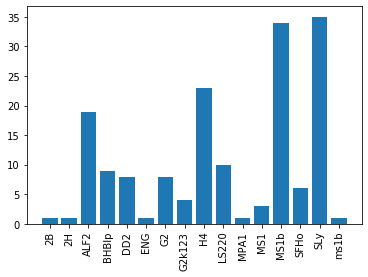

In [5]:
fig, ax = idb.show('id_eos', to_float=False) 

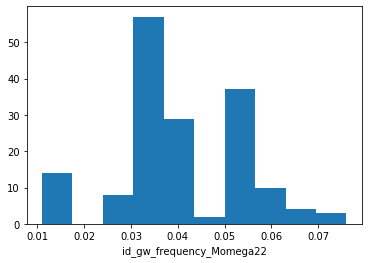

In [6]:
fig, ax = idb.show('id_gw_frequency_Momega22', to_float=True) 

#CHECK CoRe DB: some metadata val are not present in the json ! (None)
# e.g. THC:0010
# These entries needs to be fixed and pushed! 

**Note that the index contains only a subset of all the available metadata for each simulation.** We can find a group of simulations based on these metadata using usual dictionary manipulation:

In [7]:
key = 'id_eos'
val = 'DD2'
mdl_id_eos_DD2 = [i for i in idb.index if i.data[key]== val] # list of metadata(dictionaries)

# show metadata for these runs
for md in mdl_id_eos_DD2:
    for k, v in md.data.items():
        print('  {} = {}'.format(k,v))
        

  database_key = THC:0010
  simulation_name = None
  available_resolutions = R01
  reference_bibkeys = None
  id_code = None
  id_type = None
  id_mass = None
  id_rest_mass = None
  id_mass_ratio = None
  id_ADM_mass = None
  id_ADM_angularmomentum = None
  id_gw_frequency_Hz = None
  id_gw_frequency_Momega22 = 0.047
  id_eos = DD2
  id_kappa2T = None
  id_Lambda = None
  id_mass_starA = 1.200
  id_rest_mass_starA = None
  id_spin_starA = 0.00, 0.00, 0.00
  id_LoveNum_kell_starA = None
  id_Lambdaell_starA = None
  id_mass_starB = 1.200
  id_rest_mass_starB = None
  id_spin_starB = 0.00, 0.00, 0.00
  id_LoveNum_kell_starB = None
  id_Lambdaell_starB = None
  id_eccentricity = None
  evolution_code = None
  grid_refinement_levels = None
  grid_refinement_levels_moving = None
  grid_refinement_levels_npoints = None
  grid_refinement_levels_moving_npoints = None
  grid_spacing_min = 0.125
  grid_symmetries = None
  grid_shells = None
  grid_shells_radial_npoints = None
  grid_shells_angu

The relative dbkeys are

In [8]:
dbkeys_id_eos_DD2 = [md.data['database_key'] for md in mdl_id_eos_DD2]

print(dbkeys_id_eos_DD2)

['THC:0010', 'THC:0011', 'THC:0012', 'THC:0013', 'THC:0014', 'THC:0015', 'THC:0016', 'THC:0017']


We can now sync use the local DB with the entire CoRe DB:

In [9]:
#idb.sync(lfs=True, verbose=False) # this takes some time ...

But if only a subset of simulations are required, we can clone only the relative repositories. We can enforce the syncronization of a subset of simulations by passing explicitly the `dbkeys` argument:

In [10]:
cdb.sync(dbkeys=dbkeys_id_eos_DD2, verbose=False, lfs=True, prot='https')

git-clone https://core-gitlfs.tpi.uni-jena.de/core_database/THC_0010.git ...
done!
git-clone https://core-gitlfs.tpi.uni-jena.de/core_database/THC_0011.git ...
done!
git-clone https://core-gitlfs.tpi.uni-jena.de/core_database/THC_0012.git ...
done!
git-clone https://core-gitlfs.tpi.uni-jena.de/core_database/THC_0013.git ...
done!
git-clone https://core-gitlfs.tpi.uni-jena.de/core_database/THC_0014.git ...
done!
git-clone https://core-gitlfs.tpi.uni-jena.de/core_database/THC_0015.git ...
done!
git-clone https://core-gitlfs.tpi.uni-jena.de/core_database/THC_0016.git ...
done!
git-clone https://core-gitlfs.tpi.uni-jena.de/core_database/THC_0017.git ...
done!
 Found R01
Found THC:0012
 Found R02
 Found R01
Found THC:0013
 Found R01
Found THC:0015
 Found R02
 Found R01
Found THC:0016
 Found R01
Found THC:0010
 Found R01
Found THC:0017
 Found R01
Found THC:0011
 Found R01
Found THC:0014
skip core_database_index, not a DB key


The object `cdb` has inside a list of `CoRe_sim()` objects labelled by the `database_key`. Each  `CoRe_sim()` object contains metadata and data of all the runs of a simulation, i.e. the content of one of the git repo in the CoRe DB group.

In [11]:
sim = cdb.sim

# see also 2. below
print(sim.keys())

print(sim['THC:0013'].run)

print(sim['THC:0013'].run['R01'])

dict_keys(['THC:0012', 'THC:0013', 'THC:0015', 'THC:0016', 'THC:0010', 'THC:0017', 'THC:0011', 'THC:0014'])
{'R02': <watpy.coredb.coredb.CoRe_run object at 0x7f82008e8cc0>, 'R01': <watpy.coredb.coredb.CoRe_run object at 0x7f82008e8ac8>}


We now have the data we want.

In [12]:
# PS another show() of the metadata_main.txt :
# fig, ax = cdb.show('id_rest_mass', to_float=True) 
# fig, ax = cdb.show('id_eos',to_float = False) 

# 2 Get the CoRe DB data

Now, lets see better how to what is inside one simulation object:

In [13]:
thc13 = sim['THC:0013']

# metadata of this simulation - common data for all runs, from metadata_main.txt
for k, v in thc13.md.data.items():
    print('  {} = {}'.format(k,v))

  database_key = THC:0013
  simulation_name = DD2_1.350_1.350_0.00_0.00_0.055
  available_resolutions = R01, R02
  reference_bibkeys = Radice:2016rys Radice:2017lry
  id_code = LORENE
  id_type = Irrotational
  id_mass = 2.7
  id_rest_mass = 2.94554
  id_mass_ratio = 1.0
  id_ADM_mass = 2.67288
  id_ADM_angularmomentum = 7.01514
  id_gw_frequency_Hz = 663.58
  id_gw_frequency_Momega22 = 0.0554514940011
  id_eos = DD2
  id_kappa2T = 159.0084296249798
  id_Lambda = 848.0449579998918
  id_mass_starA = 1.35
  id_rest_mass_starA = 1.47277
  id_spin_starA = 0, 0, 0
  id_LoveNum_kell_starA = 0.09996, 0.0269, 0.00984
  id_Lambdaell_starA = 848.0449579998921, 2001.0063178210328, 4584.234164607441
  id_mass_starB = 1.35
  id_rest_mass_starB = 1.47277
  id_spin_starB = 0, 0, 0
  id_LoveNum_kell_starB = 0.09996, 0.0269, 0.00984
  id_Lambdaell_starB = 848.0449579998921, 2001.0063178210328, 4584.234164607441
  id_eccentricity = 
  evolution_code = None
  grid_refinement_levels = None
  grid_refineme

The runs available for this simulation:

In [14]:
print(thc13.run.keys())

dict_keys(['R02', 'R01'])


Each run is a `CoRe_run()` object that contains the metadata for the run and the actual data. The metadata is as usual

In [15]:
thc13_r01 = thc13.run['R01']

# metadata of this simulation run - note this has more info, from metadata.txt
for k, v in thc13_r01.md.data.items():
    print('  {} = {}'.format(k,v))

  database_key = THC:0013:R01
  simulation_name = DD2_1.350_1.350_0.00_0.00_0.055_0.083
  available_resolutions = None
  reference_bibkeys = Radice:2016rys Radice:2017lry
  id_code = LORENE
  id_type = Irrotational
  id_mass = 2.7
  id_rest_mass = 2.94554
  id_mass_ratio = 1.0
  id_ADM_mass = 2.67288
  id_ADM_angularmomentum = 7.01514
  id_gw_frequency_Hz = 663.58
  id_gw_frequency_Momega22 = 0.0554514940011
  id_eos = DD2
  id_kappa2T = 159.0084296249798
  id_Lambda = 848.0449579998918
  id_mass_starA = 1.35
  id_rest_mass_starA = 1.47277
  id_spin_starA = 0, 0, 0
  id_LoveNum_kell_starA = 0.09996, 0.0269, 0.00984
  id_Lambdaell_starA = 848.0449579998921, 2001.0063178210328, 4584.234164607441
  id_mass_starB = 1.35
  id_rest_mass_starB = 1.47277
  id_spin_starB = 0, 0, 0
  id_LoveNum_kell_starB = 0.09996, 0.0269, 0.00984
  id_Lambdaell_starB = 848.0449579998921, 2001.0063178210328, 4584.234164607441
  id_eccentricity = 
  evolution_code = THC
  grid_refinement_levels = 7
  grid_refine

The actual data are stored in a `CoRe_h5()` object that allows us to easily read (write) from (to) the HDF5 format. For example, we can dump the HDF5 data into `.txt` files. We can choose what to extract ($h$, $\Psi_4$ or the energetics of the waveform) or just extract everything in the same directory where the original HDF5 archive was stored. The `.txt` files can now be loaded with any python routine (or with the `wave` classes of watpy).

In [16]:
# h5 data file
print(thc13_r01.data)
print(thc13_r01.data.dfile)

# extract to txt
thc13_r01.data.write_strain_to_txt() 
thc13_r01.data.write_psi4_to_txt()
thc13_r01.data.write_EJ_to_txt()

# or all three in one:
#r01.h5.extract_all()

data.h5


**NOTE: The extracted files are not meant to be tracked by the CoRe DB repo and should not be added to any commit.**
The `CoRe_run` object can help you to delete the `.txt` files as follows:

In [17]:
thc13_r01.clean_txt() # delete files extracted from the HDF5

Removed 16 files


The `CoRe_h5()` object has also routines to directly read the data at the chosen extraction radius. If no radius is given, or if the selected radius is not within the available ones, the largest is chosen by default. So, one can finally see the data:

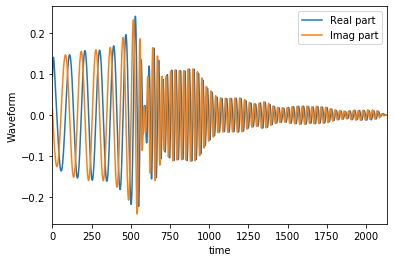

In [18]:
fig, ax = thc13_r01.data.show('rh_22')

Finally, we can check the content of the HDF5 and import the dataset as a numpy array:

energy
energy/EJ_r00400.txt
rh_22
rh_22/Rh_l0_m0_r00400.txt
rh_22/Rh_l1_m0_r00400.txt
rh_22/Rh_l1_m1_r00400.txt
rh_22/Rh_l2_m0_r00400.txt
rh_22/Rh_l2_m1_r00400.txt
rh_22/Rh_l2_m2_r00400.txt
rh_22/Rh_l3_m0_r00400.txt
rh_22/Rh_l3_m1_r00400.txt
rh_22/Rh_l3_m2_r00400.txt
rh_22/Rh_l3_m3_r00400.txt
rh_22/Rh_l4_m0_r00400.txt
rh_22/Rh_l4_m1_r00400.txt
rh_22/Rh_l4_m2_r00400.txt
rh_22/Rh_l4_m3_r00400.txt
rh_22/Rh_l4_m4_r00400.txt
rpsi4_22
rpsi4_22/Rpsi4_l0_m0_r00400.txt
rpsi4_22/Rpsi4_l1_m0_r00400.txt
rpsi4_22/Rpsi4_l1_m1_r00400.txt
rpsi4_22/Rpsi4_l2_m0_r00400.txt
rpsi4_22/Rpsi4_l2_m1_r00400.txt
rpsi4_22/Rpsi4_l2_m2_r00400.txt
rpsi4_22/Rpsi4_l3_m0_r00400.txt
rpsi4_22/Rpsi4_l3_m1_r00400.txt
rpsi4_22/Rpsi4_l3_m2_r00400.txt
rpsi4_22/Rpsi4_l3_m3_r00400.txt
rpsi4_22/Rpsi4_l4_m0_r00400.txt
rpsi4_22/Rpsi4_l4_m1_r00400.txt
rpsi4_22/Rpsi4_l4_m2_r00400.txt
rpsi4_22/Rpsi4_l4_m3_r00400.txt
rpsi4_22/Rpsi4_l4_m4_r00400.txt
[[-1.57746444e+02  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
  -0.00000000e+00

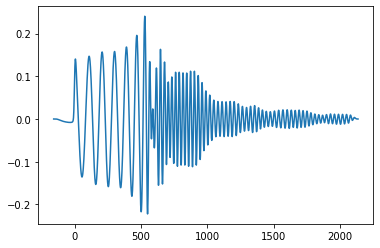

In [19]:
# check dset, h5dump -n
dset = thc13_r01.data.dump()

# import as numpy array
# 'read' is deprecated, use read_dset if possible
dset = thc13_r01.data.read('rh_22')
print(dset)

# plot it
import matplotlib.pyplot as plt
plt.plot(dset[:,0],dset[:,1])

## 3. Add a simulation to the CoRe DB

Let's assume you have a new simulation in some folder, e.g. in `MySim_THC_135135/CoReDB`, and want to update this particular run to the CoRe DB. A way to proceed is the following:

 * Create a 'pre-release' folder with data in CoRe format
 * Create a metadata file
 * Add the simulation to the CoRe_db() object
 * Push as a new CoRe repo (or as a R?? folder in an existing repo)

An upload of a new run requires a `data.h5` and either a `metadata.txt` or a python dictionary with the same information. So first we discuss how to prepare those. We then return to the `CoRe_db()` object.

Before proceeding, let's check how many runs are already present in the DB. This is done looking at the index of course.

In [20]:
code_list = [x.split(':')[0] for x in idb.dbkeys]
code_list_unique = list(set(code_list))

print('Codes {}'.format(code_list_unique))
for c in code_list_unique:
    print('{} : {} simulations'.format(c,code_list.count(c)))

Codes ['BAM', 'THC']
BAM : 128 simulations
THC : 36 simulations


The specific format of `data.h5` can be seen in the CoRe DB. These HDF5 can be produced easily; watpy provides classes to prepare it from the simulation's output. Please see the tutorial in `watpy_wave.ipynb`.

### 3.1 Prepare the metadata

The *(key,value)* pairs that have to be in the metadata can be seen in any `CoRe_md()` object, 

In [21]:
from watpy.coredb.metadata import *

md = CoRe_md()
md.info()

File metadata.txt not found

 *** CoRe DB METADATA ***

database_key : A string like BAM:0001:R01 or THC:0013:R02 that identifies the simulation by the code employed for the evolution and a unique progressive number in the CoRe DB. The first part of the string corresponds to the repository name, like `BAM:0001` or `THC:0013`, and appears in the summary `metadata_main.txt`. The full string includes the different runs (different resolutions, grid setups, hydro scheme, etc.) and appears in the `metadata.txt` inside each run folder.

simulation_name : A string that identifies the simulated binary. The convention used so far is `<EOS>_<mass1>_<mass2>_<spin1z>_<spin2z>_<initial_frequency>_<setup_details>` formatted as e.g. `2B_1.350_1.350_0.00_0.00_0.038_0.186`. Similarly to the database_key, the first part of this string common to all runs of a simulation appears in the summary `metadata_main.txt`, While the full string appears in the `metadata.txt` inside each run folder.

available_resolu

Preparing a file or a dictionary with this information is rather straighforward. In fact, we usually have this information, e.g. as JSON files, already when performing the simulations. There are only two things to know. 

First, the `database_key` and the `available_resolutions` are filled later by the method in the `CoRe_db()` we are going to use to add a simulations. Hence, it does not matter what values you put in these fields.

Second, we need a `simulation_name`. This is more annoying. The name is typically a string that identifies the physical properties of the simulated binary. So far, we have been using names like `MS1b_1.350_1.350_0.00_0.00_0.038_0.291_bigbox` (see e.g. `BAM:0065:R08`) and they can be generated with the function below. This naming convention can be in principle changed when adding a new simulation. **NOTE: the `metadata_main.txt` at the simulation level contains a field `simulation_name` which has a different value of the same field in the `metadata.txt` at the run level (check any repo of the CoRe DB). The value of the former value is the sub-string (initial part) of the latter that is common to all the runs**. We need to take care of this manually, so for the moment we will generate TWO names: a long and a short one.

In [22]:
def generate_simulation_name(EOS,MA,MB,SzA,SzB,Momega0,extra=None):
    """ String for simulation name as appearing in the metadata_main.txt """
    name = '{}_{:.3f}_{:.3f}_{:.2f}_{:.2f}_{:.3f}'.format(EOS,MA,MB,SzA,SzB,Momega0)
    if extra is not None:
        name += extra
    return name

In [23]:
simname_short = generate_simulation_name('ABC',1.35,1.35,0,0,0.03789461)

# IMPORTANT: add to the long name some info on resolution (and other specs) 
# and append a tag 'R01' so it is clear this is a run of a simulation
simname_long = generate_simulation_name('ABC',1.35,1.35,0,0,0.03789461,"_0.058_gridX_R01") 

print(simname_short)
print(simname_long)

ABC_1.350_1.350_0.00_0.00_0.038
ABC_1.350_1.350_0.00_0.00_0.038_0.058_gridX_R01


A (incomplete) dictionary for the metadata looks like the following. Note there can be as many keys as we like, those that are not reconized by the CoRe metadata will be simply discarded (If instead you do want to add a key, take a look at `watpy/coredb/metadata.py`. It is simple to add one metadata but then we need to ensure consistency of the database entries.)

In [24]:
from watpy.utils.units import MSun_sec
Msun_sec = MSun_sec() #4.925794970773135e-06

# metadata -------------------------

thcsim = {}
thcsim['database_key'] = 'will_be_assigned_by_CoRe_DB'
thcsim['simulation_name'] =  simname_short # use first the short name !
thcsim['reference_bibkeys'] = 'bibitem:2021avg'
thcsim['available_resolutions'] = '' # empty, this will be added on the way ...

thcsim['id_code']                  = 'LORENE'
thcsim['id_type']                  = 'Irrotational'
thcsim['id_mass']                  = 2.7
thcsim['id_rest_mass']             = 2.94554
thcsim['id_mass_ratio']            = 1.0
thcsim['id_ADM_mass']              = 2.67288
thcsim['id_ADM_angularmomentum']   = 7.01514
thcsim['id_gw_frequency_Hz']       = 663.58
thcsim['id_gw_frequency_Momega22'] = 0.0554514940011
thcsim['id_eos']                   = 'ABC'
thcsim['id_kappa2T']               = 159.0084296249798
thcsim['id_Lambda']                = 848.0449579998918
thcsim['id_eccentricity']          = None # None entries wil remain such in the DB !

thcsim['id_mass_starA']            = 1.35
thcsim['id_rest_mass_starA']       = 1.47277
thcsim['id_spin_starA']            = 0, 0, 0
thcsim['id_LoveNum_kell_starA']    = 0.09996, 0.0269, 0.00984
thcsim['id_Lambdaell_starA']       = 848.0449579998921, 2001.0063178210328, 4584.234164607441
thcsim['id_mass_starB']            = 1.35
thcsim['id_rest_mass_starB']       = 1.47277

# etc., etc. add all entries !

# ----------------------------------

# can add other keys, they will be eventually discarded if the the CoRe_md() method is used to write the .txt file

thcsim['mass'] = 2 * 1.364 # binary mass in solar masses
thcsim['q'] = 1.0 # mass ratio, >= 1
thcsim['f0_Hz'] = 565.08 # initial GW frequency in Hz
thcsim['f0'] = thcsim['f0_Hz'] * Msun_sec
thcsim['Momg22'] = thcsim['mass'] * thcsim['f0'] / (2*np.pi) # initial GW frequency in geom. units

thcsim['folder'] = './TestData/MySim_THC_135135' # simulation folder
thcsim['pre-release-folder'] = simname_long # folder with CoRe formatted files

### 3.1 Prepare the HDF5 data

Now we prepare the HDF5 data in the pre-release folder. If we assume waveforms, energy curves, etc have been already put in CoRe format .txt files in `thcsim['folder']/CoReDB` (see e.g. the `wat_wave.ipynb` tutorial), then we simply copy them in the pre-release folder:

In [25]:
import shutil, glob

os.makedirs(thcsim['pre-release-folder'], exist_ok=True)

for f in glob.glob(os.path.join(thcsim['folder'],'CoReDB/*.txt')):
    shutil.copyfile(f, os.path.join(thcsim['pre-release-folder'], os.path.split(f)[1]) )

Now we create the data.h5 using the `CoRe_h5()` class

In [26]:
from watpy.utils.coreh5 import CoRe_h5

ch5 = CoRe_h5(thcsim['pre-release-folder']) 

# make a list of groups and files for each group
# IMPORTANT: 
# * group names must follow the CoRe conventions
# * file names must follow the CoRe conventions
thcdat = {}
thcdat['energy'] = ['EJ_r00400.txt']
thcdat['rh_22'] = ['Rh_l2_m2_r00400.txt']
thcdat['rh_30'] = ['Rh_l3_m0_r00400.txt']
thcdat['rpsi4_20'] = ['Rpsi4_l2_m0_r00400.txt']
thcdat['rpsi4_22'] = ['Rpsi4_l2_m2_r00400.txt']

# etc., etc. ...

# create a h5 with the create_dset method
ch5.create_dset(thcdat, path = thcsim['pre-release-folder'])

Let's have a look at the content:

In [28]:
ch5.dump()

energy
energy/EJ_r00400.txt
rh_22
rh_22/Rh_l2_m2_r00400.txt
rh_30
rh_30/Rh_l3_m0_r00400.txt
rpsi4_20
rpsi4_20/Rpsi4_l2_m0_r00400.txt
rpsi4_22
rpsi4_22/Rpsi4_l2_m2_r00400.txt


### 3.3 Add to the local DB

Now we can proceed adding a new run. The first step is to reserve a DB key for the new simulation and make the folder with the correct name. Here it is also a good idea to pass the metadata information, part of which will be written in the 'metadata_main.txt'. 

In [29]:
newdbkey = cdb.add_simulation('THC', thcsim['simulation_name'], metadata = thcsim)

Wrote ./CoRe_DB_clone//THC_0037/metadata_main.txt
 Found no runs R?? folders in ./CoRe_DB_clone/THC_0037
Added THC:0037. Now you can add runs!


The second step is to add HDF5 data and metadata for each new runs

In [30]:
thcsim['simulation_name'] = simname_long # switch to long name for the run !
cdb.sim[newdbkey].add_run(path = thcsim['pre-release-folder'], metadata = thcsim)

Wrote ./CoRe_DB_clone/THC_0037/R01/metadata.txt
Wrote ./CoRe_DB_clone/THC_0037/metadata_main.txt


Thats it! If everything went fine, you have a simulation foldert to add as a repo of the CoRe DB.

In [36]:
#cdb.sim[newdbkey].run['R01'].clean_txt() # (except metadata) to prepare git commit ...

### 3.4 git add, git commit and git push

These steps must be done by hand or with a script. Make sure to have the permission to push to the repo and talk to CoRe members to coordinate this.